In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Since we need to predict the number of requests in the next minute we can treat the log entries  
# as a time series and perform forecasting using Exponential Smoothening and Holt Winter method

In [4]:
# Load the first column alone. That will give the list of timestamps

df = pd.read_csv('/Users/bjayaram/Downloads/WeblogChallenge-master/data/2015_07_22_mktplace_shop_web_log_sample.log', 
              usecols=[0],sep=' ', header = None)

df['Timestamp'] = pd.to_datetime(df[0])#,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 

# resample to generate a time-series consisting of number of requests every minute 
df = df.resample('1T').count()


df['Count']=df[0]/60
requests=df[['Count']]

#Plot the variation. Since there is only 1 day's data, the seasonality can't be detected. 
# However, we do notice a pattern of increase every 2 hrs approx.  
requests.plot(figsize=(15,8), title= 'RPS', fontsize=14)


(1001, 1) (110, 1)


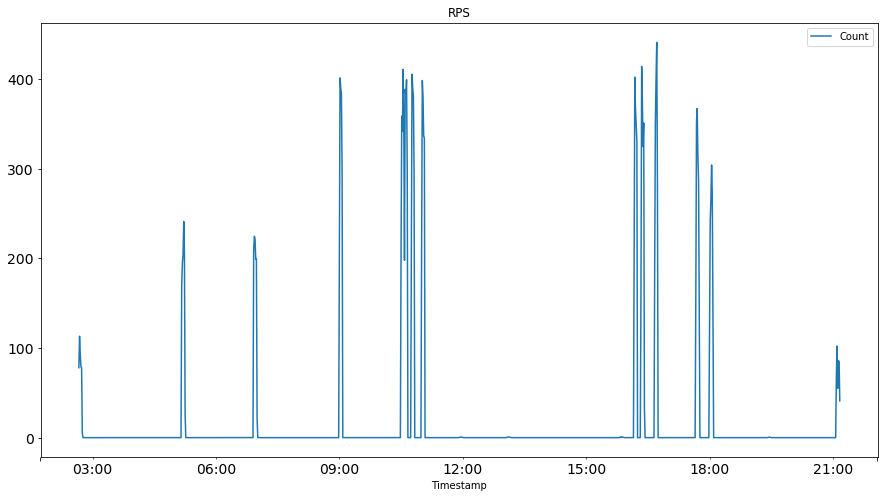

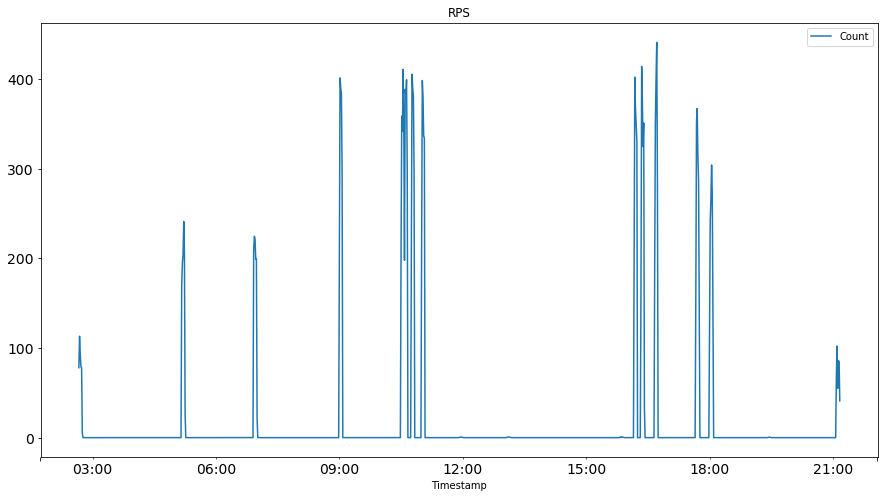

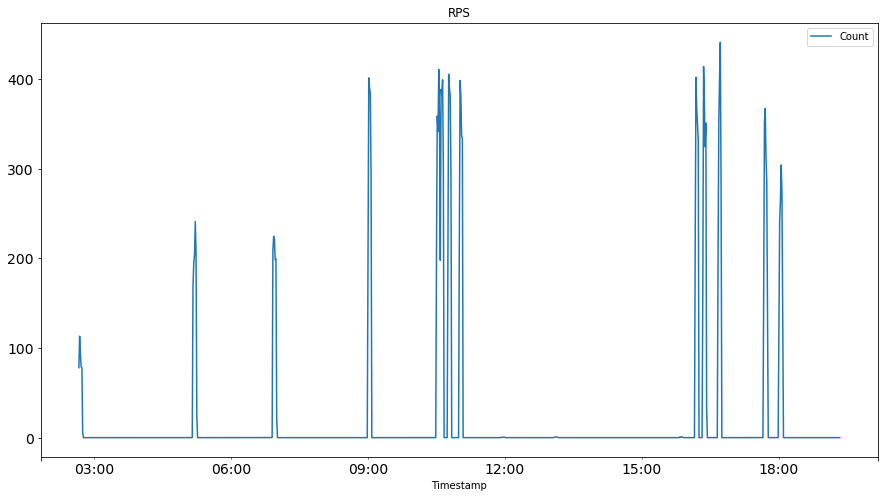

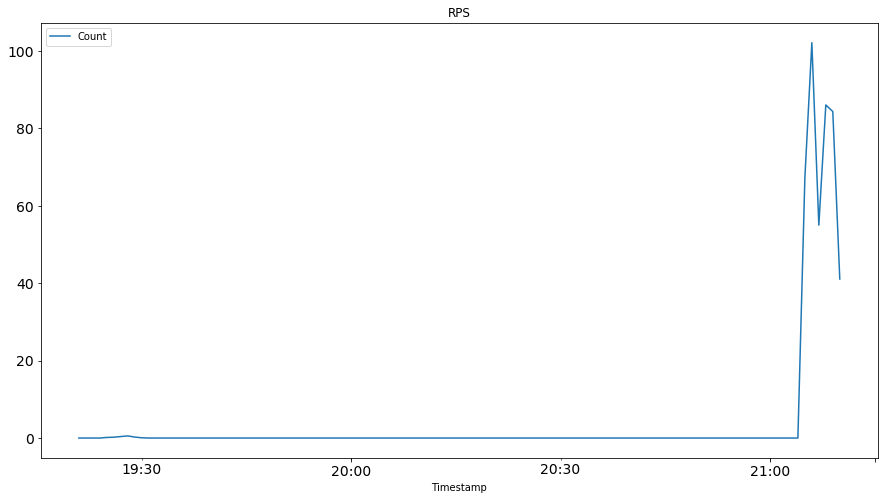

In [5]:

# Split them into training and test data. 
# Training data - Till 18:00 hrs
# Test data - From 18:00 hrs

train=requests[:1001]
test=requests[1001:]
print train.shape,test.shape
train.plot(figsize=(15,8), title= 'RPS', fontsize=14)
test.plot(figsize=(15,8), title= 'RPS', fontsize=14)
plt.show()  
# 

0.0 76.0054291821
0.1 17.6191671415
0.2 17.6291915665
0.3 17.6291936052
0.4 17.6291936053
0.5 17.6291936053
0.6 17.6291936053
0.7 17.6291936053
0.8 17.6291936053
0.9 17.6291936053


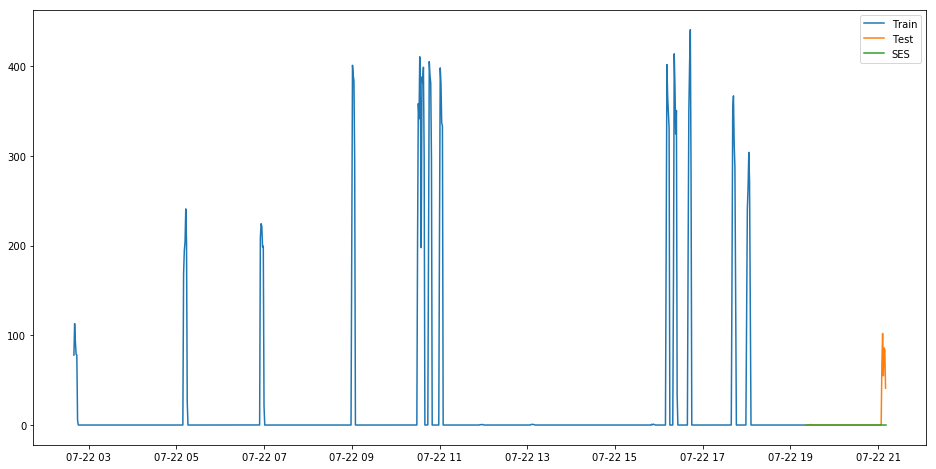

In [6]:
# Perform simple exponential smoothening
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
rms=None
for i in range(10):
    s=i/10.0
    fit = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=s,optimized=False)
    y_pred = fit.forecast(len(test))
    curr_rms = sqrt(mean_squared_error(test.Count, y_pred))
    print s, curr_rms
    if rms is None or curr_rms < rms:
        rms=curr_rms
        y_hat_avg['SES'] = y_pred
        

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

# Plot shows that exponential smoothening tends to give 0 for all results

In [ ]:
# Holt winter approach. The number of seasonal periods is varied from 50 to 120 minutes

y_hat_avg = test.copy()
rms=None
for i in range(50,120,10):
    fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=i ,trend='add', seasonal='add',).fit()
    y_pred=fit1.forecast(len(test))
    curr_rms = sqrt(mean_squared_error(test.Count, y_pred))
    
    if rms is None or curr_rms < rms:
        rms=curr_rms
        y_hat_avg['Holt_Winter'] = y_pred
    print i,curr_rms
print(rms)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# This performs slightly better than exponential smoothening as per the plot. 
# The peak occurs just 1 minute ahead of the actual peak


